**Task02-Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

In [ ]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df=pd.read_csv('/content/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


**DATA CLEANING**

In [ ]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.shape

(607, 11)

In [ ]:
print(df.isnull().sum())
print(df.info())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    o

In [ ]:
# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}

df['employment_type'] = df['employment_type'].map(employment_type_dict)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Full Time,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,Full Time,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,Full Time,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,Full Time,Data Analyst,150000,USD,150000,US,100,US,M


**DESCRIPTIVE STATISTICS**

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df['work_year'].mean()

2021.4052718286655

In [ ]:
df['salary'].std()

1544357.4866358503

In [ ]:
df['remote_ratio'].median()

100.0

In [ ]:
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

**DATA VISUALIZATION**

In [ ]:
#HISTOGRAM SHOWING PERCENTAGE OF EMPLOYEE TYPE(UNIVARIATE DATA)
fig=px.histogram(df, x = 'employment_type',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'Precentage of Employment Types')
fig.update_layout(template="plotly_dark" )
fig.show()

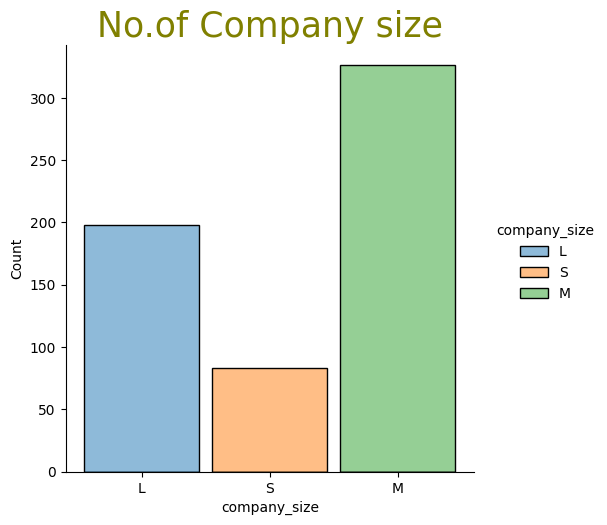

In [ ]:
#DISTPLOT SHOWING COUNT OF COMPANY SIZE
sns.displot(df,x='company_size',hue='company_size',shrink=0.9)
plt.title('No.of Company size',size=25,color='olive');

In [ ]:
# Remote_ratio
df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Full Time,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,SE,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,SE,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,M
3,2020,MI,Full Time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,SE,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Full Time,Data Engineer,154000,USD,154000,US,Fully Remote,US,M
603,2022,SE,Full Time,Data Engineer,126000,USD,126000,US,Fully Remote,US,M
604,2022,SE,Full Time,Data Analyst,129000,USD,129000,US,On-site,US,M
605,2022,SE,Full Time,Data Analyst,150000,USD,150000,US,Fully Remote,US,M


In [ ]:
#HISTOGRAM SHOWING COUNT OF EACH WORK TYPE (MULTIVARIATE ANALYSIS)
fig=px.histogram(df, x='remote_ratio',color='work_year', barmode='group',title="Count of each Work Type")
fig.update_layout(template="plotly_dark" )
fig.show();

In [ ]:
#PIE PLOT(UNIVARIATE ANALYSIS)
# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace=True)

level_counts=df.experience_level.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Experience level distribution',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

<ipython-input-20-5430ac56a754>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



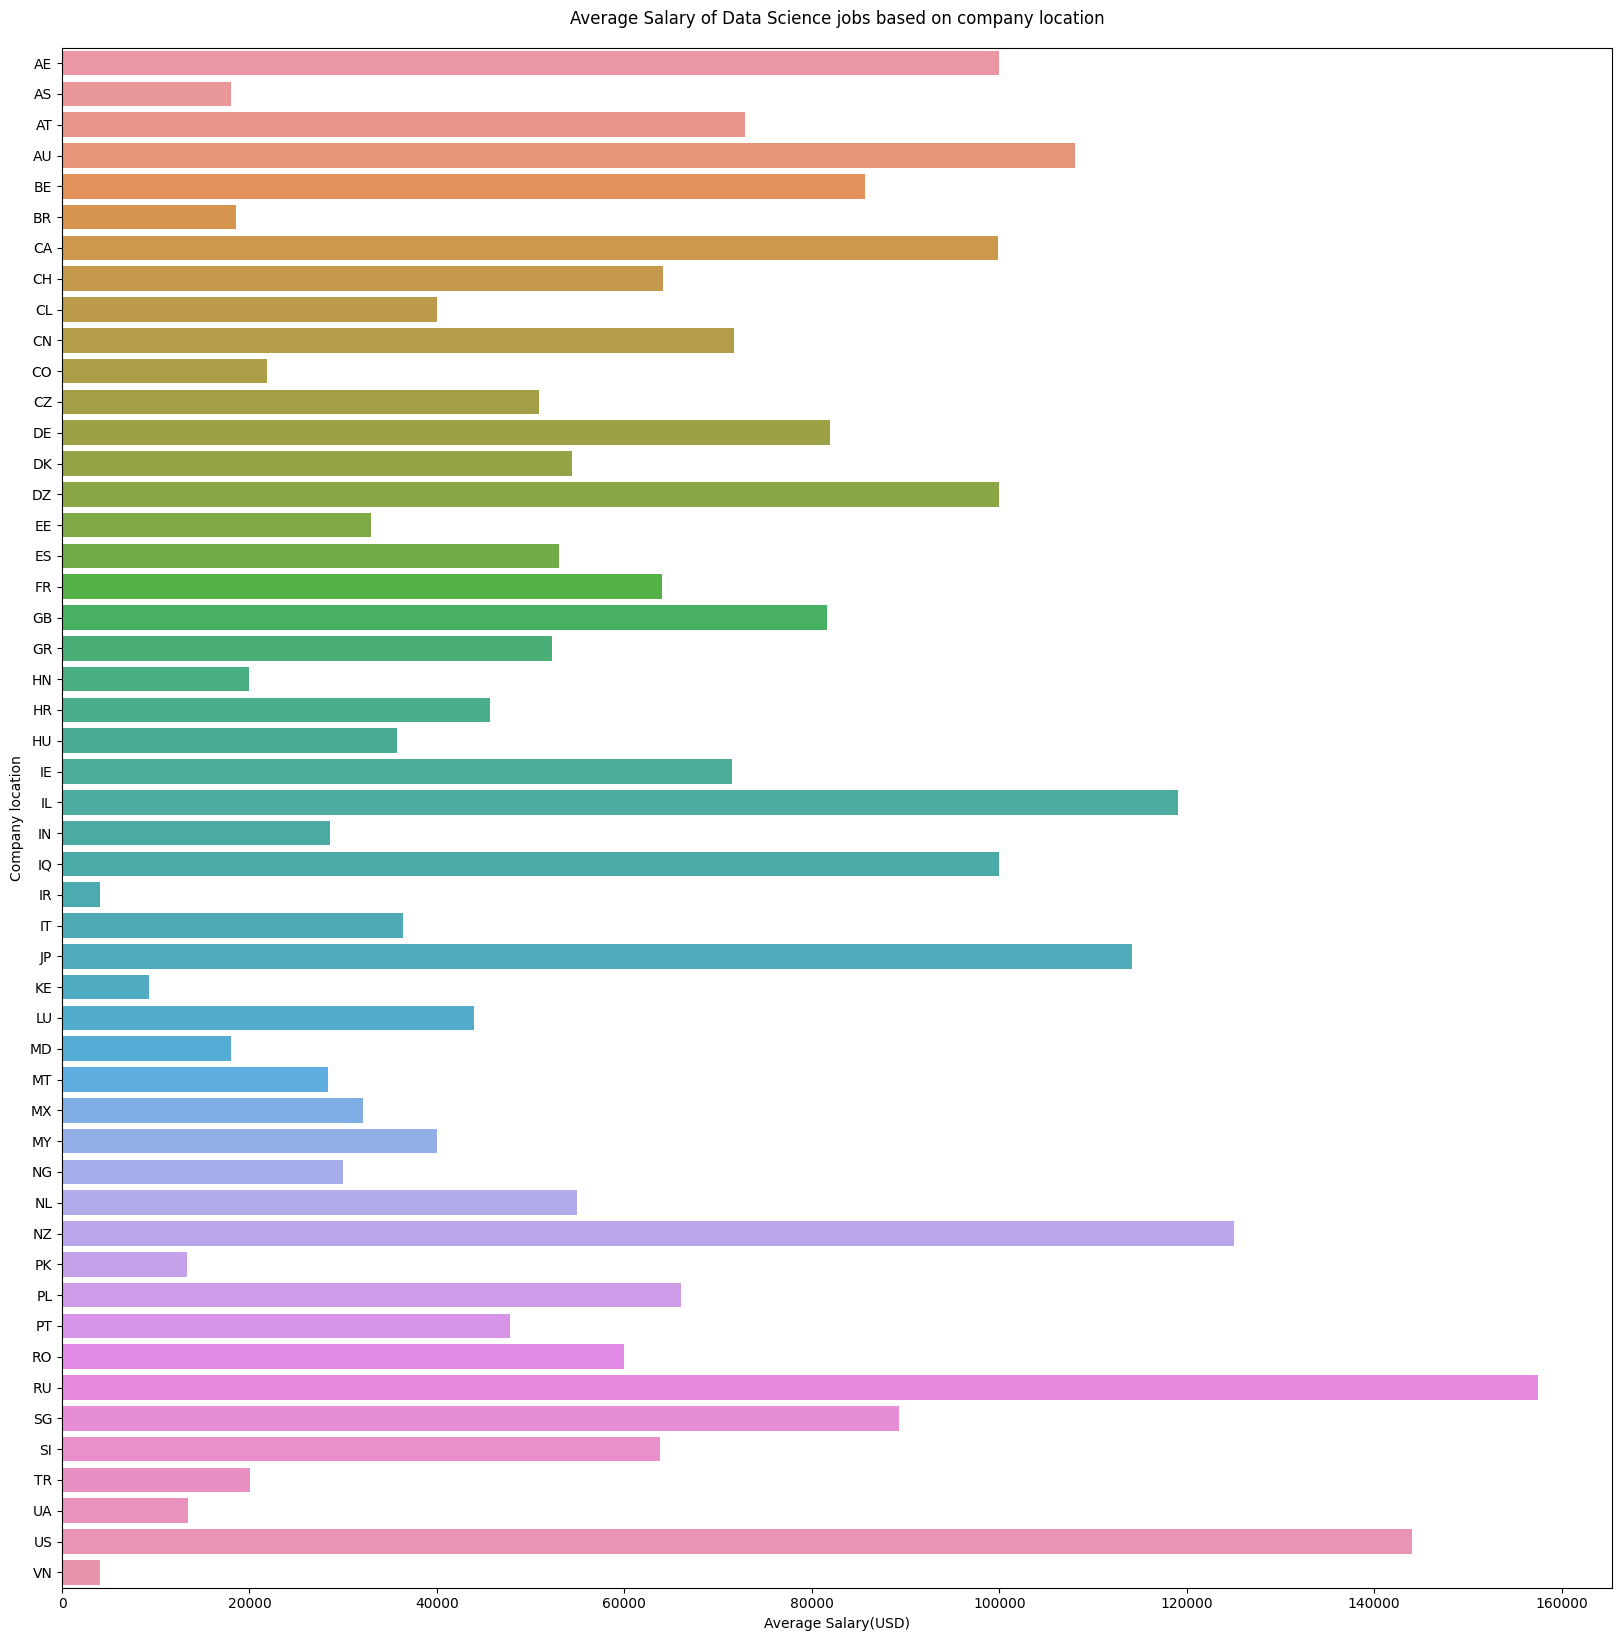

In [ ]:
#MULTIVARIATE ANALYSIS
#Average Salary of Data Science jobs based on company location
avg_sal_per_comp_location=df.groupby('company_location').mean()['salary_in_usd']

plt.figure(figsize=(20,20))
sns.barplot(x=avg_sal_per_comp_location.values,y=avg_sal_per_comp_location.index)
plt.ylabel('Company location')
plt.xlabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on company location', y=1.01);

In [ ]:
#SCATTER PLOT FOR MULTIVARIATE ANALYSIS
#SCATTERPLOT ON EMPLOYEE EXPERIENCE LEVEL AND THEIR SALARY COUNT
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title',
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'work_year', title = 'Experience level VS Salary').update_yaxes(categoryarray = ['Entry', 'Mid', 'Senior', 'Executive'])

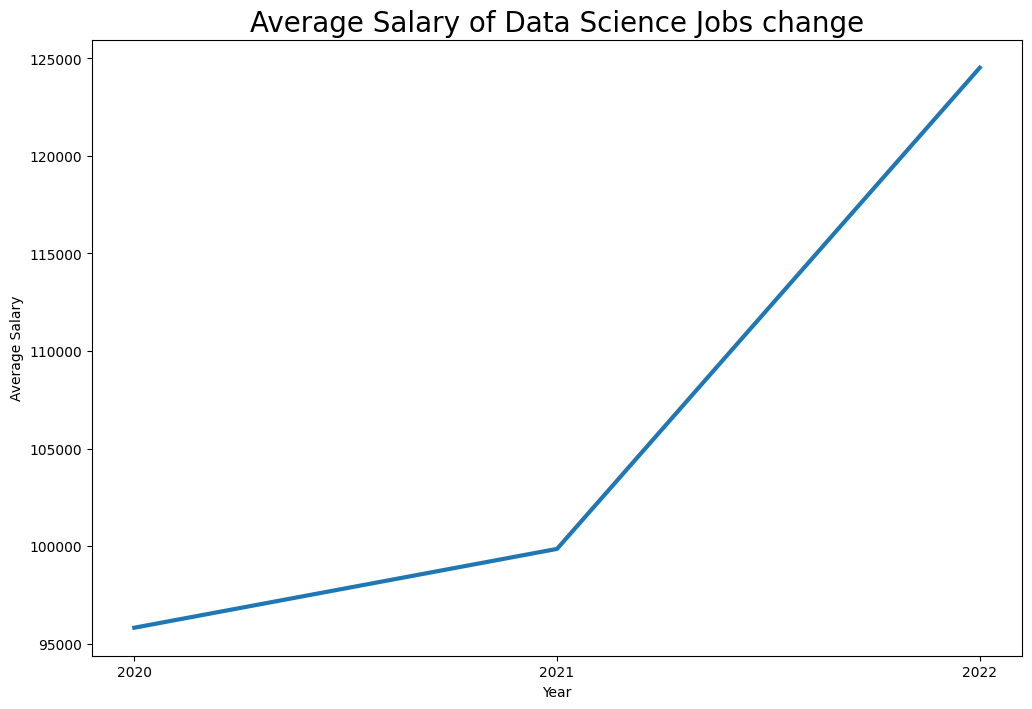

In [ ]:
#LINEPLOT(MULTIVARIATE ANALYSIS)
#Q1. How has the average salary of data science jobs change over time?
avg_sal_change=df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(12,8))
sns.lineplot(x=avg_sal_change.index,y=avg_sal_change.values,linewidth=3)

xticks=[2020,2021,2022]
plt.xticks(xticks,xticks)
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary of Data Science Jobs change', size=20);



# Observations: The average salaries increased from approximately USD96000 in 2020 to USD100000
#in 2021 and finally USD125000 in 2022. This shows a
#positive trend and shows that data science jobs are becoming more valuable as the years pass.

<ipython-input-23-c2dbe0a298fc>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



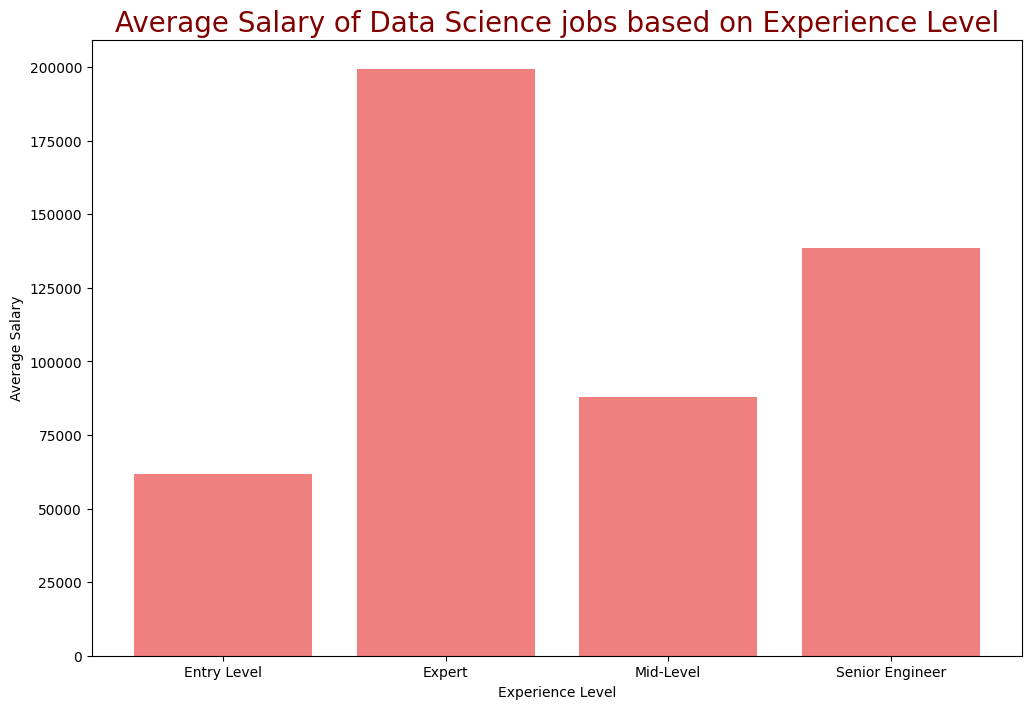

In [ ]:
#Q2. What are the salaries of Data Science jobs based on experience level?
avg_sal_per_exp=df.groupby('experience_level').mean()['salary_in_usd']

plt.figure(figsize=(12,8))
plt.bar(avg_sal_per_exp.index, avg_sal_per_exp.values,color='lightcoral')
xticks = ['Entry Level', 'Expert', 'Mid-Level', 'Senior Engineer']
xticks_loc = range(len(xticks))
plt.xticks(xticks_loc, xticks)
plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.title('Average Salary of Data Science jobs based on Experience Level', size=20, color='maroon');

Text(0.5, 1.0, 'What is the most common currency used in market ?')

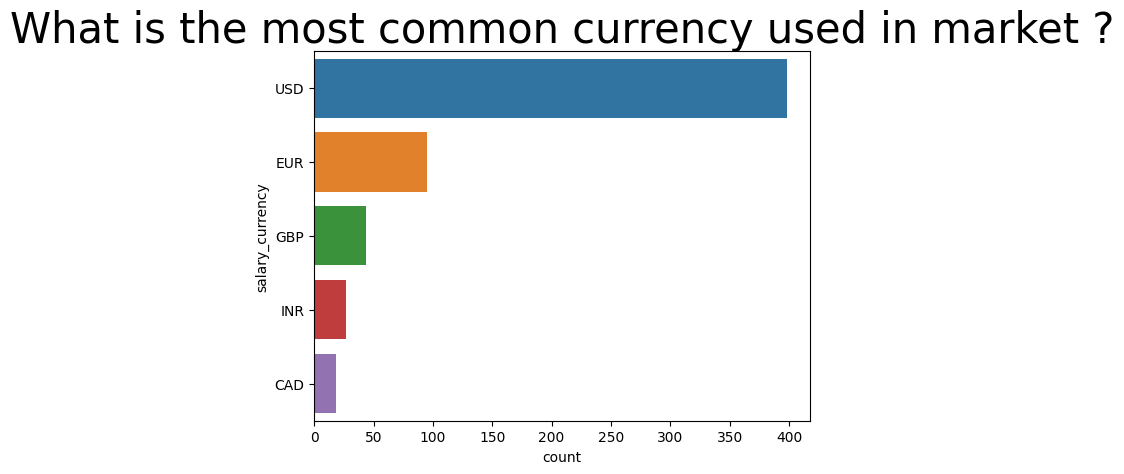

In [ ]:
#Q3.WHAT IS MOST COMMON CURRENCY IN MARKET?
sns.countplot(y=df['salary_currency'],order=df['salary_currency'].value_counts().head().index)
plt.title("What is the most common currency used in market ?",fontsize=30)

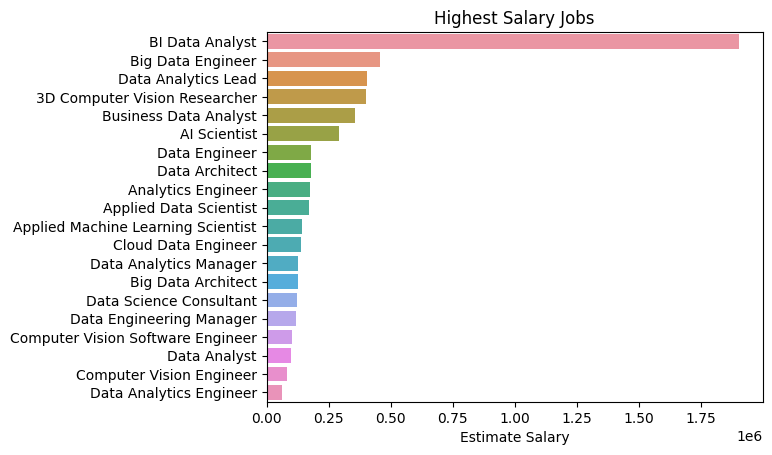

In [ ]:
#Q4. WHICH ARE THE HIGHEST SALARY JOBS?
#BARPLOT FOR MULTIVARIATE DATA
sns.barplot(x = df.groupby("job_title")["salary"].mean().head(20).sort_values(ascending = False),
            y = df.groupby("job_title")["salary"].mean().head(20).sort_values(ascending = False).index)
plt.xlabel("Estimate Salary")
plt.ylabel("")
plt.title("Highest Salary Jobs");

In [ ]:
#Q5. WHAT IS PERCENTAGE OF DATA SCIENCE JOBS BASED ON THEIR SALARY?
#PIE PLOT SHOWING PERCENTAGE OF DATA SCIENCE JOBS BASED ON SALARY(MULTIVARIATE ANALYSIS)
fig=px.pie(df.groupby('job_title',as_index=False)['salary'].count().sort_values(by='salary',ascending=False).head(5),names='job_title',values='salary',color='job_title',hole=0.7,labels={'job_title':'Job Position ','salary':'count'},template='ggplot2',title='<b>Data Science Jobs Based on Salary')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))